In [124]:
import pandas as pd

In [125]:
import numpy as np

In [ ]:
#STEP1: FIND AND DOWNLOAD DATA SET 

In [126]:
wine = pd.read_csv('Datasets/wine.csv')

In [127]:
wine.head()

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [128]:
wine["class"] = wine["class"].astype("object")

In [129]:
print(wine.dtypes)

class                         object
alcohol                      float64
malic_acid                   float64
ash                          float64
alcalinity_ash               float64
magnesium                      int64
total_phenols                float64
flavanoids                   float64
nonflavanoid_phenols         float64
proanthocyanins              float64
color_intensity              float64
hue                          float64
OD280_OD315_diluted_wines    float64
proline                        int64
dtype: object


In [132]:
y = wine[['class']]
print(y)

    class
0       1
1       1
2       1
3       1
4       1
..    ...
173     3
174     3
175     3
176     3
177     3

[178 rows x 1 columns]


In [131]:
X = wine.drop(['class'], axis=1)
print(X)

     alcohol  malic_acid   ash  alcalinity_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43            15.6        127           2.80   
1      13.20        1.78  2.14            11.2        100           2.65   
2      13.16        2.36  2.67            18.6        101           2.80   
3      14.37        1.95  2.50            16.8        113           3.85   
4      13.24        2.59  2.87            21.0        118           2.80   
..       ...         ...   ...             ...        ...            ...   
173    13.71        5.65  2.45            20.5         95           1.68   
174    13.40        3.91  2.48            23.0        102           1.80   
175    13.27        4.28  2.26            20.0        120           1.59   
176    13.17        2.59  2.37            20.0        120           1.65   
177    14.13        4.10  2.74            24.5         96           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0     

In [ ]:
#STEP 2: DIVIDE INTO TRAINING AND TESTING SET

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [134]:
y_train["class"].value_counts()

2    53
1    44
3    36
Name: class, dtype: int64

In [135]:
y_test["class"].value_counts()

2    18
1    15
3    12
Name: class, dtype: int64

In [ ]:
#STEP 3 and STEP 4: EXPLORE TRAINING SET AND DATA CLEANING

In [75]:
# checking for missing values
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   class                      178 non-null    int64  
 1   alcohol                    178 non-null    float64
 2   malic_acid                 178 non-null    float64
 3   ash                        178 non-null    float64
 4   alcalinity_ash             178 non-null    float64
 5   magnesium                  178 non-null    int64  
 6   total_phenols              178 non-null    float64
 7   flavanoids                 178 non-null    float64
 8   nonflavanoid_phenols       178 non-null    float64
 9   proanthocyanins            178 non-null    float64
 10  color_intensity            178 non-null    float64
 11  hue                        178 non-null    float64
 12  OD280_OD315_diluted_wines  178 non-null    float64
 13  proline                    178 non-null    int64  

In [76]:
wine.describe()

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 34 to 65
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   alcohol                    133 non-null    float64
 1   malic_acid                 133 non-null    float64
 2   ash                        133 non-null    float64
 3   alcalinity_ash             133 non-null    float64
 4   magnesium                  133 non-null    int64  
 5   total_phenols              133 non-null    float64
 6   flavanoids                 133 non-null    float64
 7   nonflavanoid_phenols       133 non-null    float64
 8   proanthocyanins            133 non-null    float64
 9   color_intensity            133 non-null    float64
 10  hue                        133 non-null    float64
 11  OD280_OD315_diluted_wines  133 non-null    float64
 12  proline                    133 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 14.5 KB


In [137]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 34 to 65
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   133 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


In [138]:
from sklearn.linear_model import LinearRegression

In [140]:
linreg = LinearRegression().fit(X_train, y_train)

In [88]:
# evaluate the model on the test set
print("Test set score: {:.2f}".format(linreg.score(X_test, y_test)))

Test set score: 0.92


In [ ]:
#STEP 5: VISUALIZE DATA IN TRAINING SET 

In [90]:
import matplotlib.pyplot as plt

<AxesSubplot:>

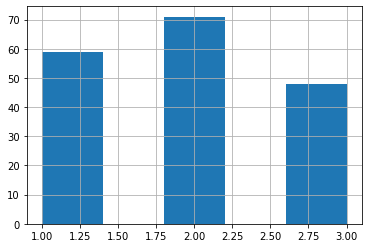

In [141]:
wine["class"].hist(bins=5)

In [142]:
avg_alcohol_by_class = wine.groupby("class")["alcohol"].mean()

In [143]:
print(avg_alcohol_by_class)

class
1    13.744746
2    12.278732
3    13.153750
Name: alcohol, dtype: float64


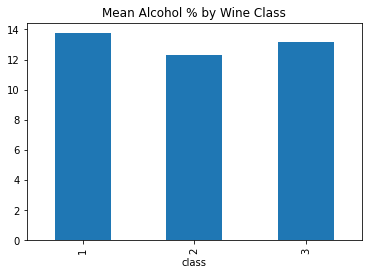

In [144]:
avg_alcohol_by_class.plot(kind="bar", title="Mean Alcohol % by Wine Class")
plt.show()

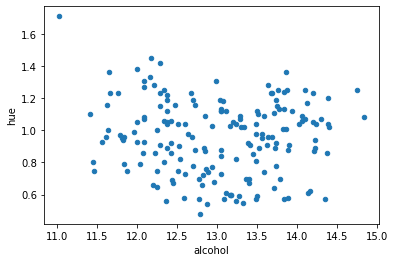

In [145]:
#Scatter plot
wine.plot(x="alcohol", y="hue", kind="scatter")
plt.show()


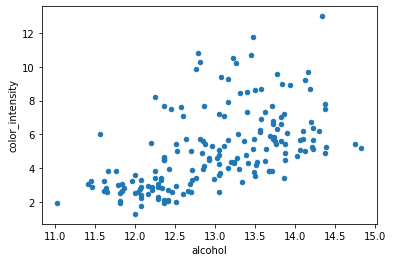

In [103]:
#Scatter plot
wine.plot(x="alcohol", y="color_intensity", kind="scatter")
plt.show()

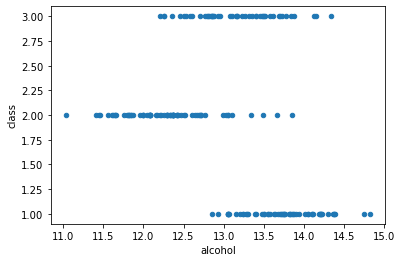

In [157]:
wine.plot(x="alcohol", y="class", kind="scatter")
plt.show()

In [183]:
#STEP 6: APPLYING TRANSFORMATIONS TO DATA AND VISUALIZING
print(wine.var())

class                            0.600679
alcohol                          0.659062
malic_acid                       1.248015
ash                              0.075265
alcalinity_ash                  11.152686
magnesium                      203.989335
total_phenols                    0.391690
flavanoids                       0.997719
nonflavanoid_phenols             0.015489
proanthocyanins                  0.327595
color_intensity                  5.374449
hue                              0.052245
OD280_OD315_diluted_wines        0.504086
proline                      99166.717355
proline_log                      0.172314
dtype: float64
99166.71735542428
203.9893353646925


In [188]:
# LOGARITHMIC
wine["proline_log"] = np.log(wine["proline"])
wine["magnesium_log"] = np.log(wine["magnesium"])

In [189]:
print(wine["proline_log"].var())
print(wine["magnesium_log"].var())

0.17231366191842018
0.0034857990306044503


In [190]:
print(wine["proline_log"])
print(wine["magnesium_log"])

0      6.970730
1      6.956545
2      7.077498
3      7.299797
4      6.599870
         ...   
173    6.606650
174    6.620073
175    6.727432
176    6.733402
177    6.327937
Name: proline_log, Length: 178, dtype: float64
0      3.155559
1      3.054359
2      3.058676
3      3.106746
4      3.124980
         ...   
173    3.031958
174    3.062941
175    3.132013
176    3.132013
177    3.036551
Name: magnesium_log, Length: 178, dtype: float64


In [192]:
#Squaring
wine["proline_square"] = np.square(wine["proline"])
wine["magnesium_square"] = np.square(wine["magnesium"])

print(wine["proline_square"])
print(wine["magnesium_square"])

0      1134225
1      1102500
2      1404225
3      2190400
4       540225
        ...   
173     547600
174     562500
175     697225
176     705600
177     313600
Name: proline_square, Length: 178, dtype: int64
0      550.660127
1      449.761977
2      453.661773
3      499.441846
4      517.991735
          ...    
173    430.056131
174    457.548079
175    525.329938
176    525.329938
177    434.025323
Name: magnesium_square, Length: 178, dtype: float64


In [194]:
#Cubing
wine["proline_cubed"] = np.power(wine["proline"],3)
wine["magnesium_cubed"] = np.power(wine["magnesium"],3)

print(wine["proline_cubed"])
print(wine["magnesium_cubed"])

0      1207949625
1      1157625000
2      1664006625
3      3241792000
4       397065375
          ...    
173     405224000
174     421875000
175     582182875
176     592704000
177     175616000
Name: proline_cubed, Length: 178, dtype: int64
0      12921.872323
1       9538.368708
2       9662.695163
3      11161.624061
4      11789.197564
           ...     
173     8918.415770
174     9787.124325
175    12040.602734
176    12040.602734
177     9042.168651
Name: magnesium_cubed, Length: 178, dtype: float64


In [210]:
#Exponentials 
wine["proline_exp"] = np.exp(wine["proline"])
wine["magnesium_exp"] = np.exp(wine["magnesium"])

print(wine["proline_exp"])
print(wine["magnesium_exp"])

0                inf
1                inf
2                inf
3                inf
4                inf
           ...      
173              inf
174              inf
175              inf
176              inf
177    1.602913e+243
Name: proline_exp, Length: 178, dtype: float64
0      1.553169e+10
1      1.623082e+09
2      1.779036e+09
3      5.078062e+09
4      7.661179e+09
           ...     
173    1.014635e+09
174    1.948593e+09
175    8.996282e+09
176    8.996282e+09
177    1.116288e+09
Name: magnesium_exp, Length: 178, dtype: float64


<AxesSubplot:>

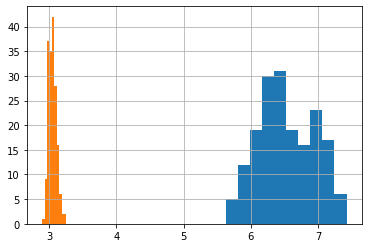

In [206]:
#PLOT THE TRANSFORMED DATA
#HISTOGRAMS
#log
wine["proline_log"].hist()
wine["magnesium_log"].hist()

<AxesSubplot:>

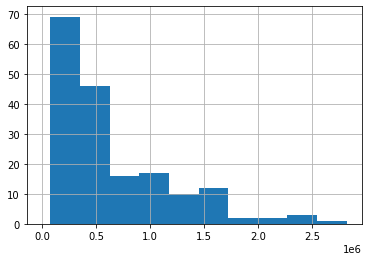

In [205]:
#squared
wine["proline_square"].hist()
wine["magnesium_square"].hist()

<AxesSubplot:>

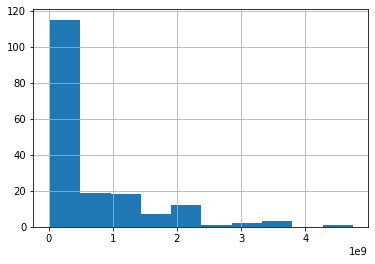

In [207]:
#cubed
wine["proline_cubed"].hist()
wine["magnesium_cubed"].hist()

<AxesSubplot:>

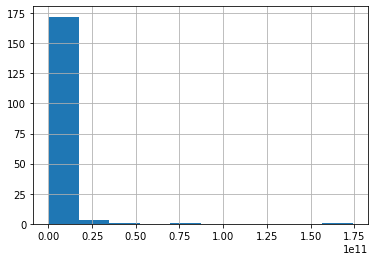

In [211]:
#exponential
wine["magnesium_exp"].hist()

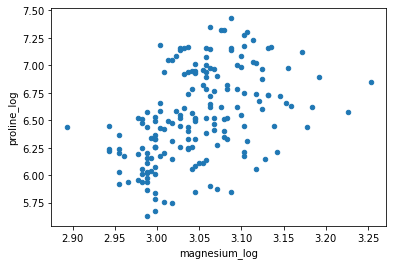

In [213]:
#SCATTERPLOTS
#log
wine.plot(x="magnesium_log", y="proline_log", kind="scatter")
plt.show()

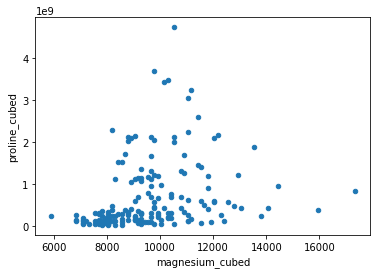

In [214]:
#cubed
wine.plot(x="magnesium_cubed", y="proline_cubed", kind="scatter")
plt.show()

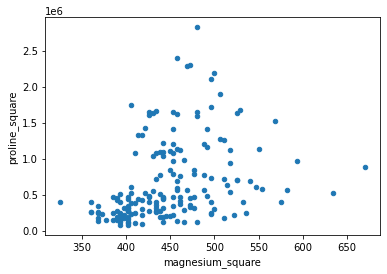

In [215]:
wine.plot(x="magnesium_square", y="proline_square", kind="scatter")
plt.show()

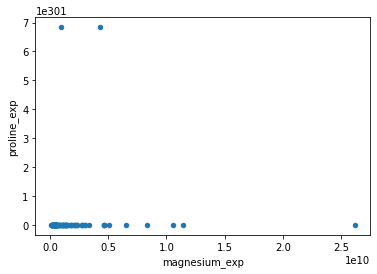

In [216]:
wine.plot(x="magnesium_exp", y="proline_exp", kind="scatter")
plt.show()